<a href="https://colab.research.google.com/github/GoldKodo/aiphython/blob/main/20240524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df= pd.read_csv('iris.csv')
df.info()

# 칼럼별 결측치의 계수 확인
df.isnull().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
###결측치 처리
#결측치 포함 행 제거
df.dropna(how='any')
#결측치 채우가
df.fillna(0, inplace=True)
#결측치 변경
df.replace(np.nan,0)

###중복값 처리
import pandas as pd
df = pd.read_csv('iris.csv')
df[df.duplicated()]
#중복값 제거
df2= df.drop_dulicates()

In [7]:
# 이상치 탐색
import pandas as pd
df = pd.read_csv('iris.csv')
df.describe()
# sorting
iris_data.sort_values(by=['petal_length’,], ascending=False)
# 시각화
plt.scatter(x = iris_data['petal_length'], y = iris_data['petal_width'])
plt.show

SyntaxError: unterminated string literal (detected at line 6) (<ipython-input-7-6bb94e435fb4>, line 6)

<function matplotlib.pyplot.show(close=None, block=None)>

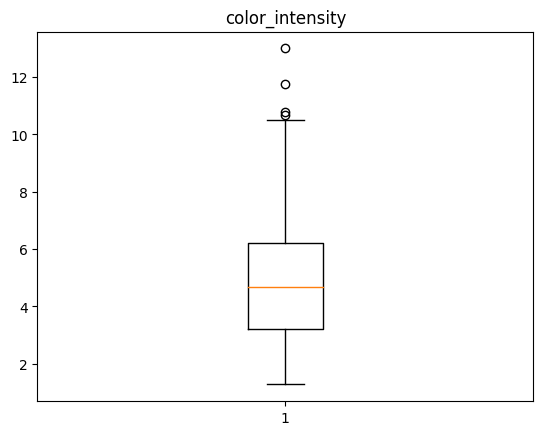

In [9]:
#이상치 확인 및 정제 boxplot
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1:'class_1', 2:'class_2'})

import matplotlib.pyplot as plt
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show

In [12]:
#이상치 확인 및 정제 IQR 공식
import numpy as np
quartile_1, quartile_3 = np.percentile(wine['color_intensity'], [25,75])
iqr = quartile_3 - quartile_1
upper_whis = quartile_3 + 1.5*iqr
lower_whis = quartile_1 - 1.5*iqr
outliers = wine['color_intensity'][(wine['color_intensity’] > upper_whis)|(wine['color_intensity'] < lower_whis)]
print(outliers)
print(outliers.index)

SyntaxError: unterminated string literal (detected at line 7) (<ipython-input-12-083befa86e35>, line 7)

In [49]:
#펭귄데이터 이상치 확인 정제
import pandas as pd
df = pd.read_csv('penguins.csv')
df.info()

#중복값 확인 및 제거
df[df.duplicated()]
df2 = df.drop_duplicates()

#결측치 채우고 확인
df2.fillna(0, inplace=True)

#이상치 확인
df2.describe()
df2.sort_values(by = ['body_mass_g'], ascending=False)


#시각화
#plt.scatter(x = df2['bill_length_mm'], y = df2['body_mass_g'])
#plt.show

#이상치 확인 및 정제
import numpy as np
quartile_1, quartile_3 = np.percentile(df2['body_mass_g'], [25,75])
print(quartile_1)
print(quartile_3)
iqr = quartile_3 = quartile_1
upper_whis = quartile_3 + 1.5*iqr
lower_whis = quartile_1 - 1.5*iqr
outliers = df2['body_mass_g'][(df2['body_mass_g'] > upper_whis)|(df2['body_mass_g'] < lower_whis)]
print(outliers)
print(outliers.index)

#이상치 제거
drop_outliers = df2.drop(index = outliers.index)
print('outliers :', df2.shape)
print('Dropt outliers :', drop_outliers.shape)

#이상치 대체
df2.loc[outliers.index, 'body_mass_g'] = df2['body_mass_g'].dropna().mean()
df2.loc[outliers.index, 'body_mass_g']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
3550.0
4750.0
Series([], Name: body_mass_g, dtype: float64)
Index([], dtype='int64')
outliers : (344, 7)
Dropt outliers : (344, 7)


Series([], Name: body_mass_g, dtype: float64)